# Naïve-Bayes Assignment


# 1. Load the dataset using pandas 
2. Extract data fromOutcome column is a variable named Y 
3. Extract data from every column except Outcome column in a variable named X
4. Divide the dataset into two parts for training and testing in 70% and 30% proportion 
5. Create and train Naïve Bayes Model on training set 
6. Make predictions based on the testing set using the trained model 
7. Check the performance by calculating the confusion matrix and accuracy score of the model 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes-1.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
x=list(df.columns)

In [6]:
x

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

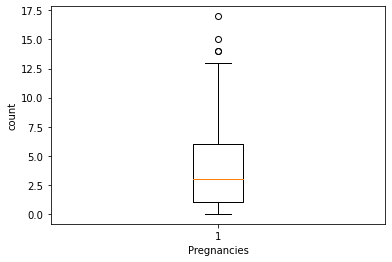

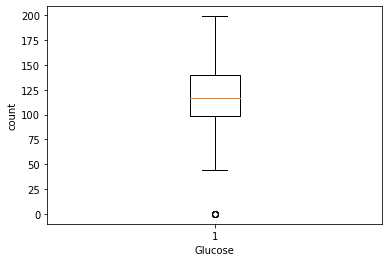

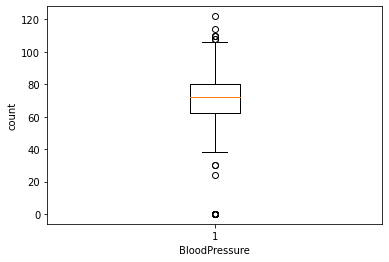

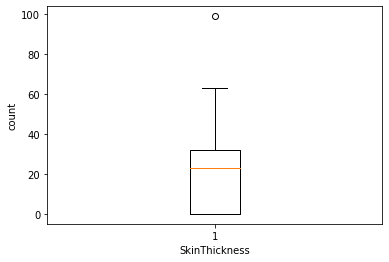

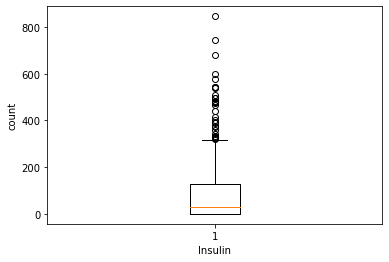

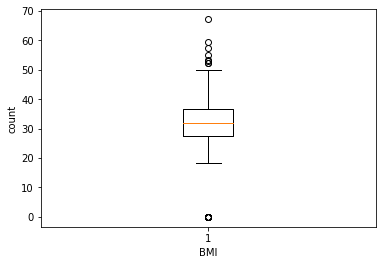

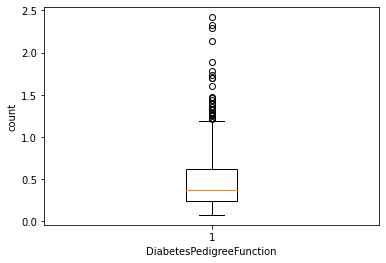

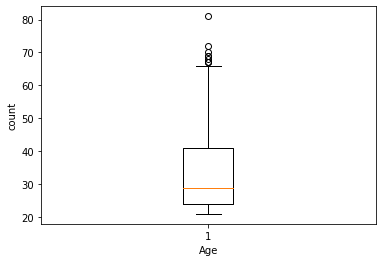

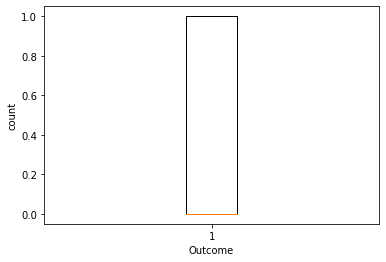

In [7]:
for i in x:
    if(df[i].dtypes=='float64')|(df[i].dtypes=='int64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [8]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
df2=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

In [9]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
c=list(df2.columns)

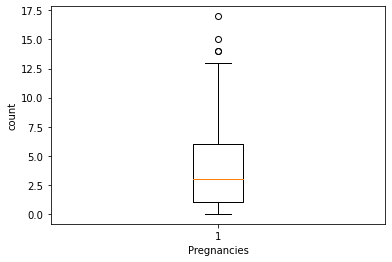

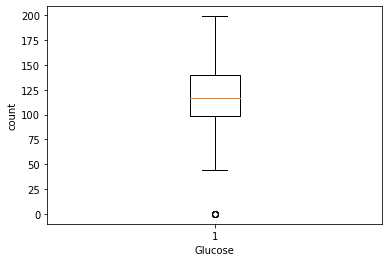

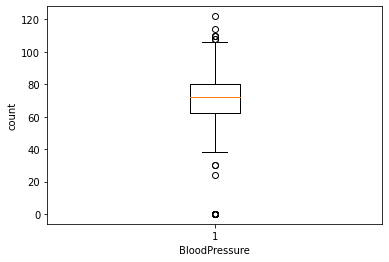

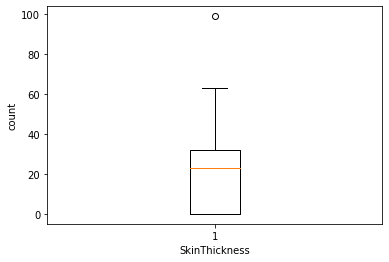

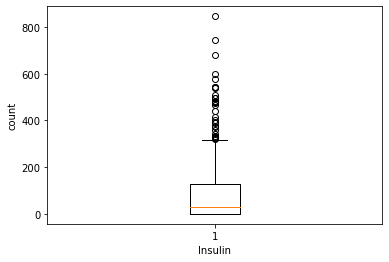

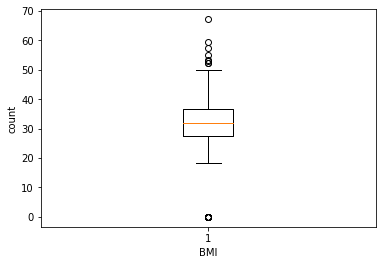

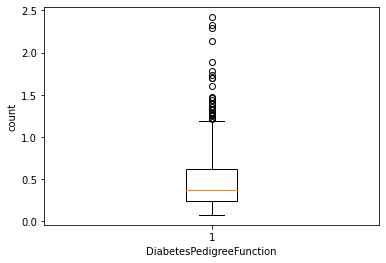

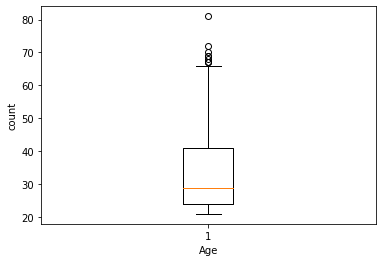

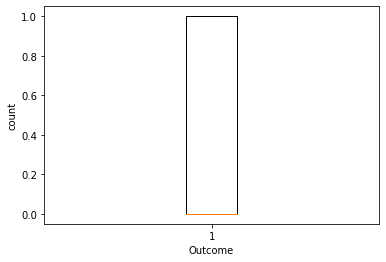

In [11]:
for i in c:
    if(df[i].dtypes=='float64')|(df[i].dtypes=='int64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
c


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [14]:
z=[]
for i in c:
    if(df2[i].dtypes!='Outcome'):
        z.append(i)

In [15]:
z

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [16]:
b=df2[c]

In [17]:
vif=pd.DataFrame()
vif["features"]=b.columns
vif["vif"]=[variance_inflation_factor(b.values,i)for i in range(len(b.columns))]
print(vif)

                   features        vif
0               Pregnancies   3.560003
1                   Glucose  23.640378
2             BloodPressure  39.804923
3             SkinThickness   4.431872
4                   Insulin   2.557022
5                       BMI  31.094937
6  DiabetesPedigreeFunction   4.143076
7                       Age  16.595196
8                   Outcome   1.885315


In [18]:
df2.drop('BloodPressure',axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8488\2356176119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('BloodPressure',axis=1,inplace=True)


In [19]:
vif=pd.DataFrame()
vif["features"]=g.columns
vif["vif"]=[variance_inflation_factor(g.values,i)for i in range(len(g.columns))]
print(vif)

NameError: name 'g' is not defined

In [20]:
df2.drop('BMI',axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8488\1347802607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('BMI',axis=1,inplace=True)


In [21]:
e=list(df2.columns)

In [22]:
l=df2[e]

In [23]:
vif=pd.DataFrame()
vif["features"]=l.columns
vif["vif"]=[variance_inflation_factor(l.values,i)for i in range(len(l.columns))]
print(vif)

                   features        vif
0               Pregnancies   3.552760
1                   Glucose  13.044487
2             SkinThickness   3.372048
3                   Insulin   2.423153
4  DiabetesPedigreeFunction   3.883176
5                       Age  13.597716
6                   Outcome   1.754295


In [24]:
df2.drop('Age',axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8488\3188771172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Age',axis=1,inplace=True)


In [25]:
w=list(df2.columns)

In [26]:
w=df2[w]

In [27]:
vif=pd.DataFrame()
vif["features"]=w.columns
vif["vif"]=[variance_inflation_factor(w.values,i)for i in range(len(w.columns))]
print(vif)

                   features       vif
0               Pregnancies  2.479548
1                   Glucose  6.344850
2             SkinThickness  3.363643
3                   Insulin  2.372775
4  DiabetesPedigreeFunction  3.787480
5                   Outcome  1.736300


In [28]:
x=df2.iloc[:,:-1]

In [29]:
x

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction
0,6,148,35,0,0.627
1,1,85,29,0,0.351
2,8,183,0,0,0.672
3,1,89,23,94,0.167
5,5,116,0,0,0.201
...,...,...,...,...,...
763,10,101,48,180,0.171
764,2,122,27,0,0.340
765,5,121,23,112,0.245
766,1,126,0,0,0.349


In [30]:
y=df2.iloc[:,-1]

In [31]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [40]:
y_pred = classifier.predict(x_test)  

In [41]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [43]:
cm

array([[125,   7],
       [ 32,  28]], dtype=int64)

In [44]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.796875


In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       132
           1       0.80      0.47      0.59        60

    accuracy                           0.80       192
   macro avg       0.80      0.71      0.73       192
weighted avg       0.80      0.80      0.78       192

